In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import wimprates as wr
wr.__version__

'0.3.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numericalunits as nu

In [5]:
from tqdm import tqdm

In [6]:
from scipy.integrate import quad as scipy_int

# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

14 october 2019 

## Goal ## 

- Roughly reproduce <https://journals.aps.org/prd/abstract/10.1103/PhysRevD.83.083505>
- Update the results thereof with more recent knowledge of the DM-distribution

### Approach ###
To achieve these goals, we must first get a decent recoil spectrum, that is flexible enough to have different astrophysical parameters. Further, it must also be flexible enough to be able to allow for different analytic functions to be added to the model. For instance, we must be able to incorporate the $\rm{SHM}^{++}$ as presented here <https://arxiv.org/abs/1810.11468>.

When we have a sufficiently flexible model, we want to add in the detector physics, we should therein incorporate at least the following parameters:
- target
  - material
  - cross-section
- threshold
- background
- cut efficiency  
- volume
- exposure

Finally we should perform the inference

## HALO model ##



/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/wimprates-0.3.0-py3.7.egg/wimprates/halo.py:129: RuntimeWarning: divide by zero encountered in true_divide
  / (2 * v_earth_t * v))


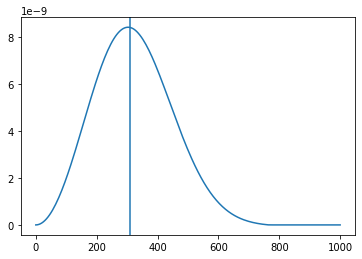

In [7]:
x = np.linspace(0,1000,200) * nu.km / nu.s
y2 = wr.observed_speed_dist(x, 0)
plt.plot(x/(nu.km / nu.s),y2)
plt.axvline(310)

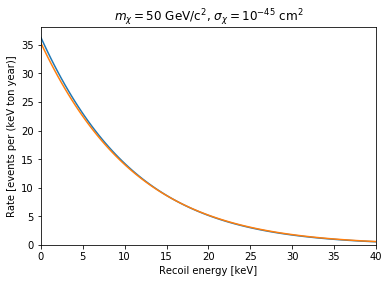

In [8]:
# NR's
energies = np.linspace(0.001, 40, 100)

# dr/dr
dr = wr.rate_wimp_std(energies, mw=50, sigma_nucleon=1e-45)

plt.plot(energies, dr)

plt.xlabel("Recoil energy [keV]")
plt.ylabel("Rate [events per (keV ton year)]")
plt.title("$m_\chi = 50$ GeV/c${}^2$, $\sigma_\chi = 10^{-45}$ cm${}^2$")
plt.xlim(0, energies.max())
plt.ylim(0, None);

use_SHM = dddm.SHM()
dr_shm = wr.rate_wimp_std(energies, mw=50, sigma_nucleon=1e-45, halo_model = use_SHM)
plt.plot(energies, dr_shm, label = "Modified SHM")


## Detector smearing

In [9]:
import DirectDmTargets as dddm
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
# _bin_low, _bin_high, _nbin = 0.001, 40, 10
# for _bin in tqdm(dddm.get_bins(_bin_low, _bin_high, _nbin)):
#     x = _bin.mean()
#     y = dddm.N_r(_bin[0], _bin[1], 1, smearing = False)
#     plt.scatter(x,y, c = 'r')
# for _bin in tqdm(dddm.get_bins(_bin_low, _bin_high, _nbin)):
#     x = _bin.mean()
#     y = dddm.N_r(_bin[0], _bin[1], 1, smearing = True)
#     plt.scatter(x,y, c = 'b', label = 'smeared')
    
# plt.ylabel("N events [keV$^{-1}$]")
# plt.xlabel("Recoil energy [keV]")

In [11]:
# TO DO

# Inference #
Below we setup the inference

# Emcee #
<https://emcee.readthedocs.io/en/stable/tutorials/quickstart/>

In [12]:
import pandas as pd

In [13]:
import scipy

In [14]:
import emcee
emcee.__version__

'3.0.0'

In [15]:
pd.set_option('display.max_rows', 500)

## Distribution of the DM ##
First we need to make a DM-rate spectrum

In [16]:
benchmark = {'mw':50, 'sigma_nucleon':1e-45}

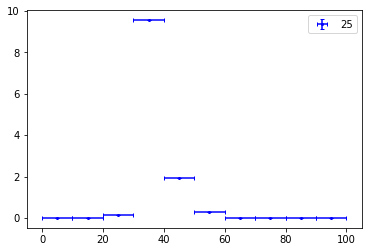

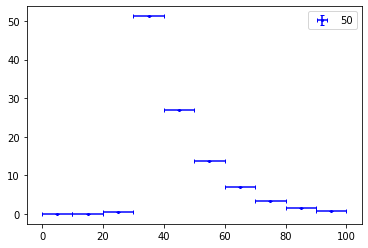

In [17]:
use_SHM = dddm.SHM()
counts = {}
for m in [25,50]:
    xe_events = dddm.DetectorSpectrum(m, 1e-45, use_SHM, dddm.detectors['Ge'])
    xe_events.n_bins = 10
    xe_events.E_max = 100
    xe_data = xe_events.get_data(poisson = False)
    dddm.plot_spectrum(xe_data, plot_error=False, label=m)
    plt.legend()
    plt.show()
# plt.axhline(0)
# plt.yscale("log")
    counts[m] = xe_data['counts']

In [18]:
for i in range(len(counts[25])):
    i_25, i_50 = counts[25][i], counts[50][i]
    print(i_50, i_25, dddm.log_likelihood_function(i_50, i_25))
#     print(dddm.log_likelihood_function(counts[50][:i+1], counts[25][:i+1]))
print()
print(dddm.log_likelihood(counts[25], counts[50]))

0.0 0.0 -1e-300
1.8273995223672102e-131 4.6709387627251495e-132 -5.5307247590554736e-129
0.47984392606807574 0.12264491057096578 -1.008252456070187
51.23078200836332 9.547707761518927 -47.27539660512712
26.807273950455652 1.9281053181500163 -48.247590987082056
13.690223402507824 0.26198357197421357 -42.965777422692604
6.862124785779938 0.00819997227868724 -41.219798354794776
3.364694783336058 3.1766461878892774e-22 -168.82402916225843
1.6073496165838759 1.5886300388360756e-155 -573.2831334966729
0.7338771943500938 0.0 -506.8561149752851

-74.7547180140675


 27%|██▋       | 8/30 [00:00<00:00, 73.32it/s]

----25----
Ar


100%|██████████| 30/30 [00:00<00:00, 73.34it/s]
/data/xenon/joranang/software/DD_DM_targets/DirectDmTargets/plot_basics.py:102: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  plt.plot(var, plr, linestyle = 'steps-mid')


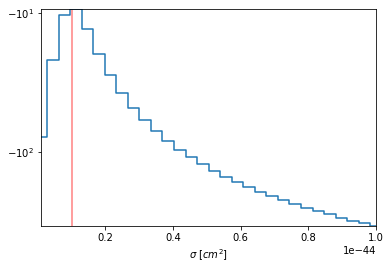

100%|██████████| 100/100 [00:01<00:00, 73.11it/s]


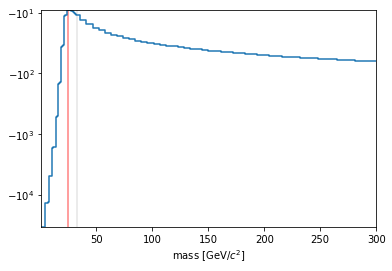

 33%|███▎      | 10/30 [00:00<00:00, 96.27it/s]

Xe


100%|██████████| 30/30 [00:00<00:00, 95.90it/s]


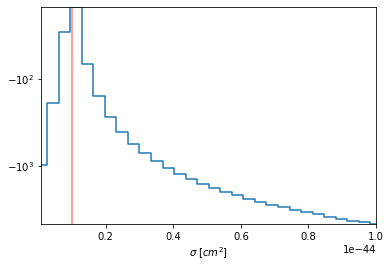

100%|██████████| 100/100 [00:01<00:00, 80.65it/s]


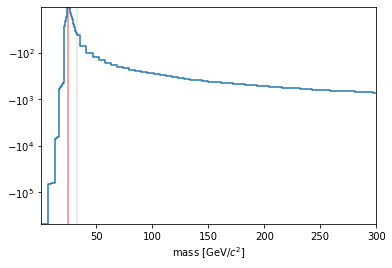

 30%|███       | 9/30 [00:00<00:00, 81.06it/s]

Ge


100%|██████████| 30/30 [00:00<00:00, 80.23it/s]


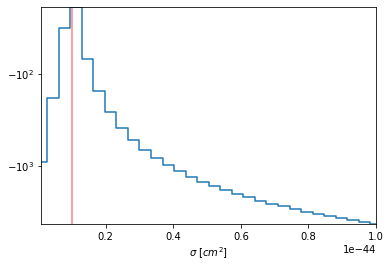

100%|██████████| 100/100 [00:01<00:00, 76.42it/s]


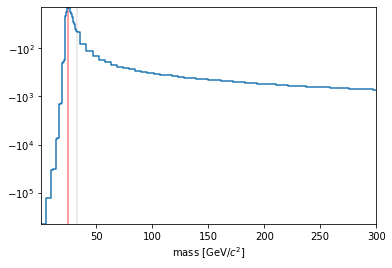

 23%|██▎       | 7/30 [00:00<00:00, 64.71it/s]

----50----
Ar


100%|██████████| 30/30 [00:00<00:00, 64.17it/s]


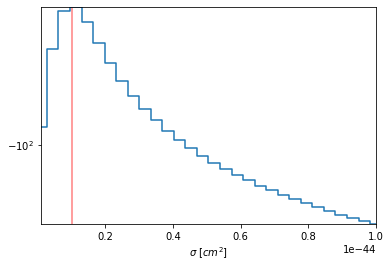

100%|██████████| 100/100 [00:01<00:00, 72.92it/s]


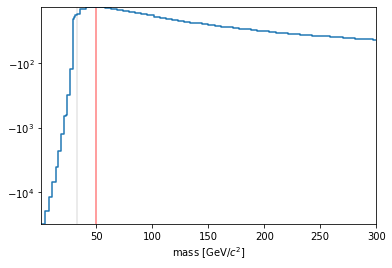

 23%|██▎       | 7/30 [00:00<00:00, 64.52it/s]

Xe


100%|██████████| 30/30 [00:00<00:00, 64.19it/s]


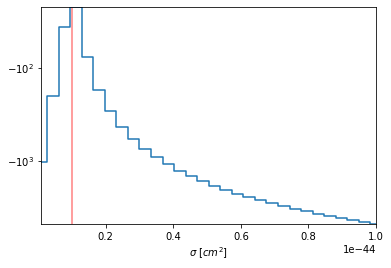

100%|██████████| 100/100 [00:01<00:00, 81.06it/s]


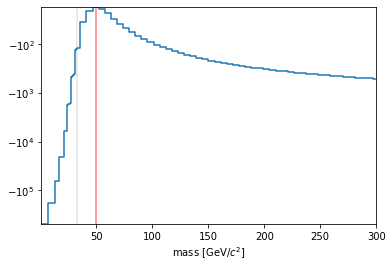

 23%|██▎       | 7/30 [00:00<00:00, 64.67it/s]

Ge


100%|██████████| 30/30 [00:00<00:00, 64.14it/s]


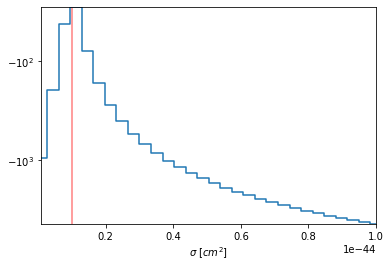

100%|██████████| 100/100 [00:01<00:00, 76.76it/s]


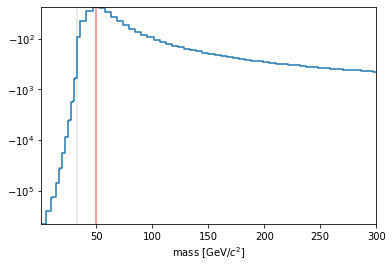

 23%|██▎       | 7/30 [00:00<00:00, 62.29it/s]

----250----
Ar


100%|██████████| 30/30 [00:00<00:00, 63.82it/s]


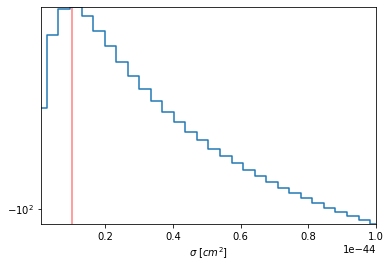

100%|██████████| 100/100 [00:01<00:00, 73.64it/s]


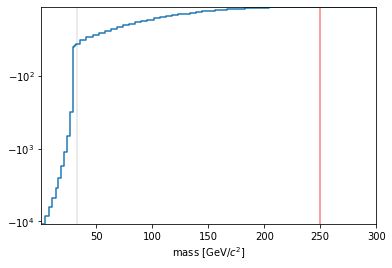

 23%|██▎       | 7/30 [00:00<00:00, 64.73it/s]

Xe


100%|██████████| 30/30 [00:00<00:00, 64.40it/s]


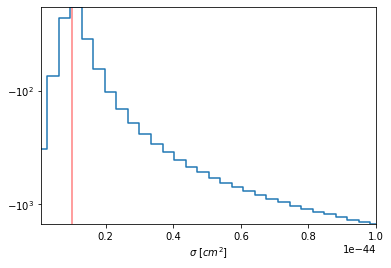

100%|██████████| 100/100 [00:01<00:00, 80.73it/s]


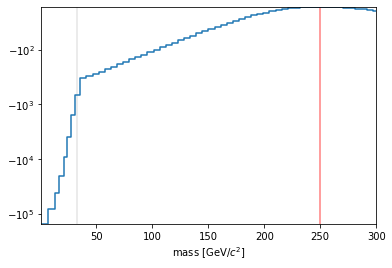

 23%|██▎       | 7/30 [00:00<00:00, 64.54it/s]

Ge


100%|██████████| 30/30 [00:00<00:00, 64.42it/s]


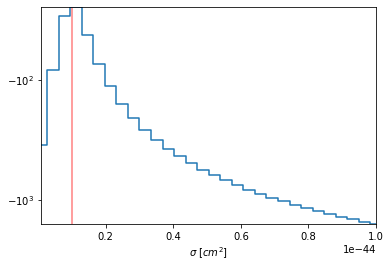

100%|██████████| 100/100 [00:01<00:00, 76.72it/s]


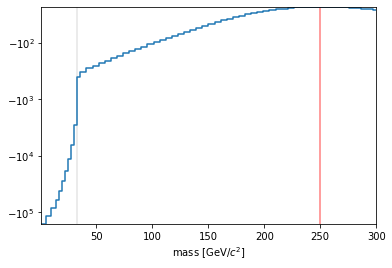

In [19]:
for m in [25, 50, 250]:
    print(f"----{m}----")
    for det in ['Ar', 'Xe', 'Ge']:
#     for det in ['Ar']:

        print(det)
        dddm.plt_ll_sigma_spec(det, m=m, bins = 10)
        plt.yscale('symlog')
        plt.show()
        dddm.plt_ll_mass_spec(det,  m=m, bins = 10)
    #     plt.xlim(49,55)
        plt.yscale('symlog')
        plt.show()

In [20]:
dddm.log_likelihood_function(1e-12,0)

-6.901982609185033e-10

In [21]:
np.log(0) * 0

/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/data/xenon/joranang/anaconda/envs/dddm/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


nan

In [22]:
# for m in [25, 50, 250]:
#     print(f"----{m}----")
# #     for det in ['Ar', 'Xe', 'Ge']:
#     for det in ['Ar']:

#         print(det)
#         dddm.plt_ll_sigma_det(det, m=m, bins = 10)
#         plt.yscale('symlog')
#         plt.show()
#         dddm.plt_ll_mass_det(det,  m=m, bins = 10)
#     #     plt.xlim(49,55)
#         plt.yscale('symlog')
#         plt.show()

  0%|          | 0/30 [00:00<?, ?it/s]

----25----
Ar


100%|██████████| 30/30 [00:02<00:00, 11.21it/s]


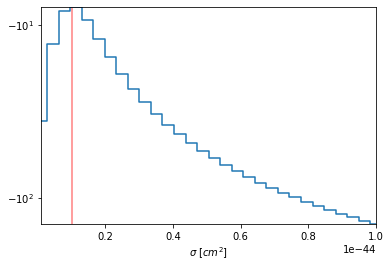

100%|██████████| 100/100 [00:08<00:00, 11.29it/s]


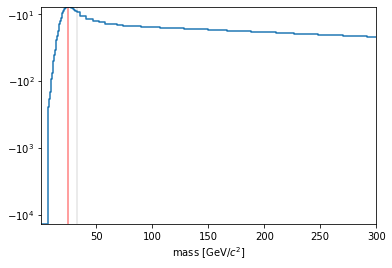

  7%|▋         | 2/30 [00:00<00:01, 18.28it/s]

Xe


100%|██████████| 30/30 [00:01<00:00, 18.35it/s]


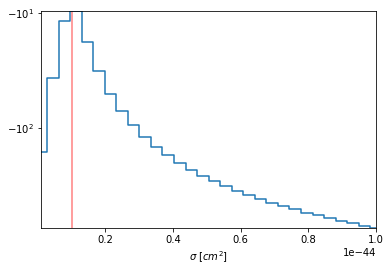

100%|██████████| 100/100 [00:07<00:00, 13.08it/s]


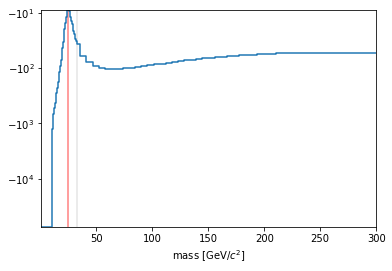

  0%|          | 0/30 [00:00<?, ?it/s]

Ge


100%|██████████| 30/30 [00:02<00:00, 13.55it/s]


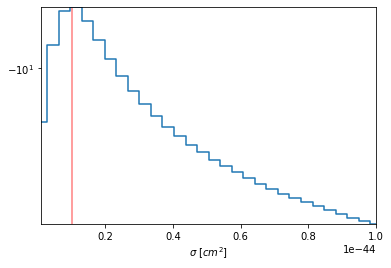

100%|██████████| 100/100 [00:08<00:00, 11.99it/s]


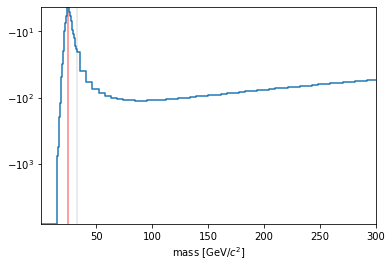

  3%|▎         | 1/30 [00:00<00:03,  9.13it/s]

----50----
Ar


100%|██████████| 30/30 [00:03<00:00,  9.15it/s]


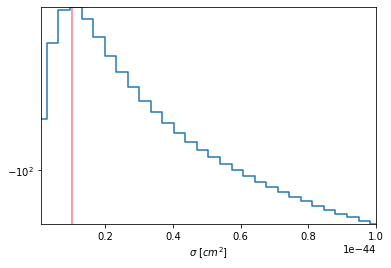

100%|██████████| 100/100 [00:08<00:00, 11.31it/s]


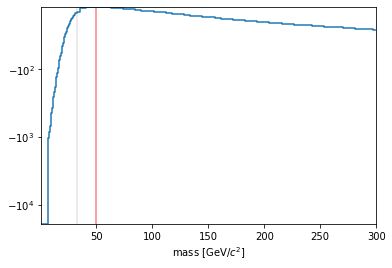

  3%|▎         | 1/30 [00:00<00:03,  9.31it/s]

Xe


100%|██████████| 30/30 [00:03<00:00,  9.23it/s]


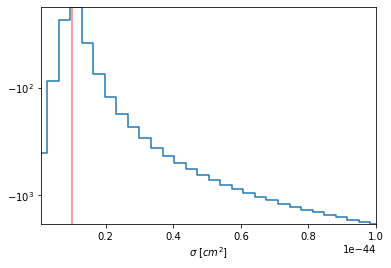

100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


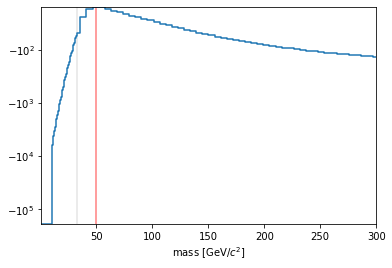

  3%|▎         | 1/30 [00:00<00:03,  9.31it/s]

Ge


100%|██████████| 30/30 [00:03<00:00,  9.17it/s]


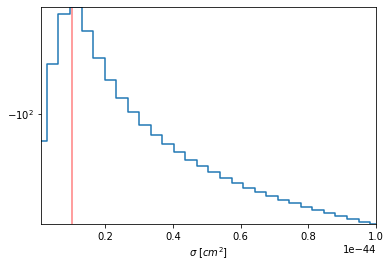

100%|██████████| 100/100 [00:08<00:00, 11.98it/s]


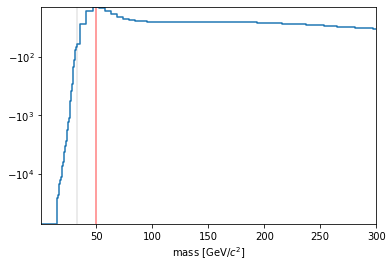

  3%|▎         | 1/30 [00:00<00:03,  9.25it/s]

----250----
Ar


100%|██████████| 30/30 [00:03<00:00,  9.14it/s]


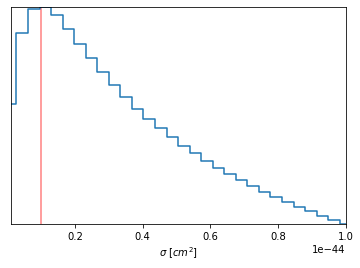

100%|██████████| 100/100 [00:08<00:00, 11.32it/s]


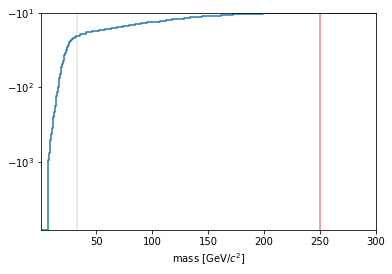

  3%|▎         | 1/30 [00:00<00:03,  9.15it/s]

Xe


100%|██████████| 30/30 [00:03<00:00,  9.13it/s]


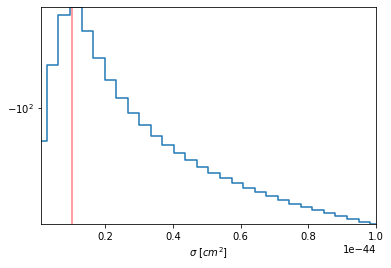

100%|██████████| 100/100 [00:07<00:00, 13.05it/s]


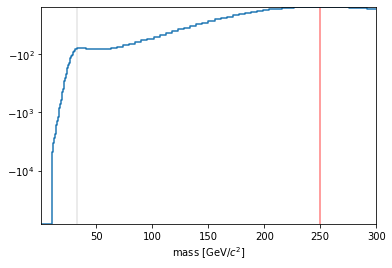

  0%|          | 0/30 [00:00<?, ?it/s]

Ge


100%|██████████| 30/30 [00:03<00:00,  9.16it/s]


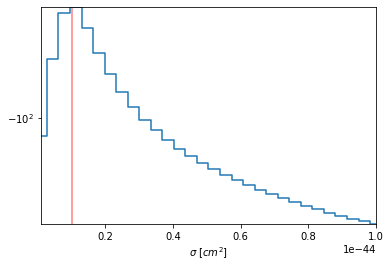

100%|██████████| 100/100 [00:08<00:00, 12.02it/s]


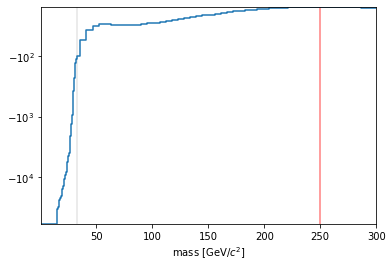

In [23]:
for m in [25, 50, 250]:
    print(f"----{m}----")
    for det in ['Ar', 'Xe', 'Ge']:
#     for det in ['Ar']:

        print(det)
        dddm.plt_ll_sigma_det(det, m=m, bins = 10)
        plt.yscale('symlog')
        plt.show()
        dddm.plt_ll_mass_det(det,  m=m, bins = 10)
    #     plt.xlim(49,55)
        plt.yscale('symlog')
        plt.show()

----25----
Ar


100%|██████████| 30/30 [00:25<00:00,  1.15it/s]


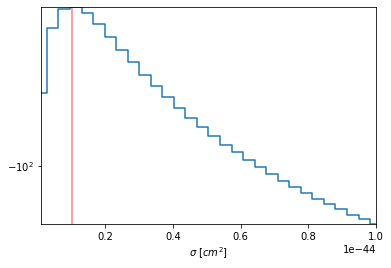

100%|██████████| 100/100 [01:25<00:00,  1.16it/s]


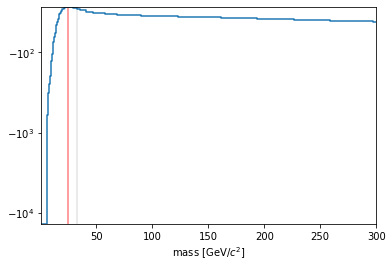

Xe


100%|██████████| 30/30 [00:15<00:00,  1.90it/s]


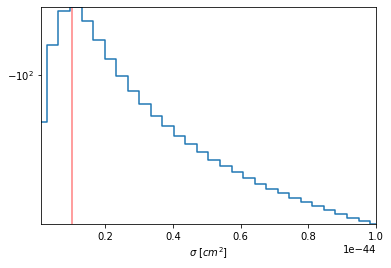

100%|██████████| 100/100 [01:14<00:00,  1.35it/s]


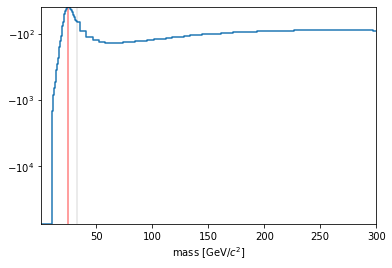

Ge


100%|██████████| 30/30 [00:21<00:00,  1.38it/s]


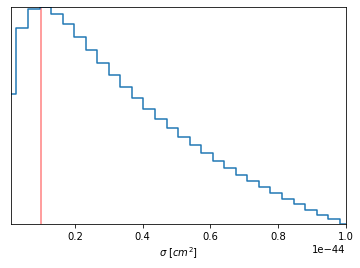

100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


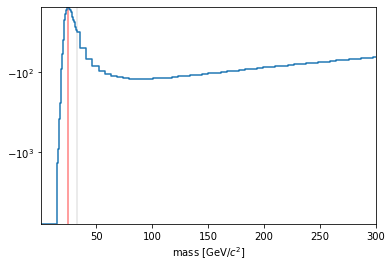

----50----
Ar


100%|██████████| 30/30 [00:31<00:00,  1.06s/it]


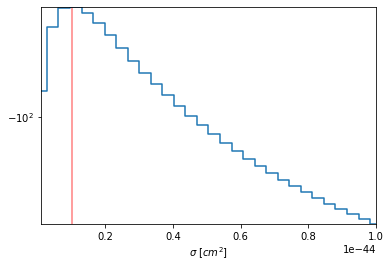

100%|██████████| 100/100 [01:25<00:00,  1.16it/s]


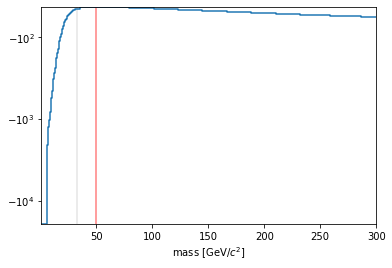

Xe


100%|██████████| 30/30 [00:31<00:00,  1.07s/it]


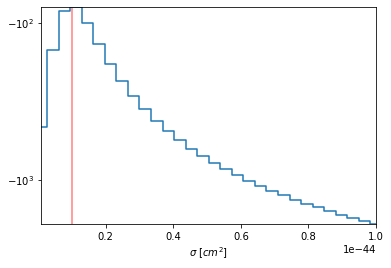

100%|██████████| 100/100 [01:13<00:00,  1.35it/s]


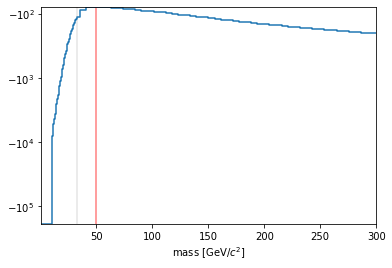

Ge


100%|██████████| 30/30 [00:32<00:00,  1.07s/it]


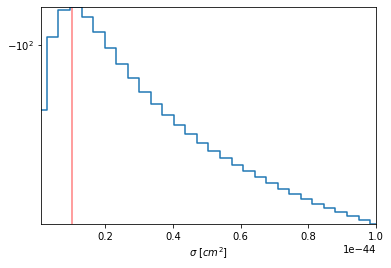

100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


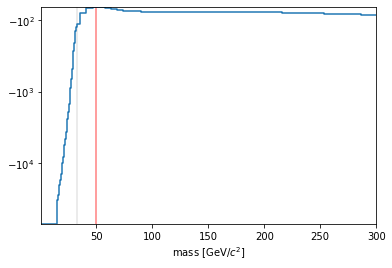

----250----
Ar


100%|██████████| 30/30 [00:31<00:00,  1.06s/it]


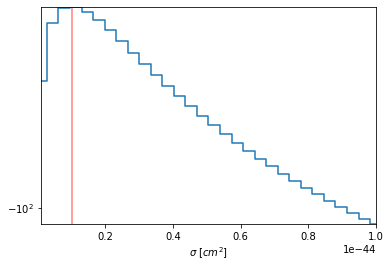

100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


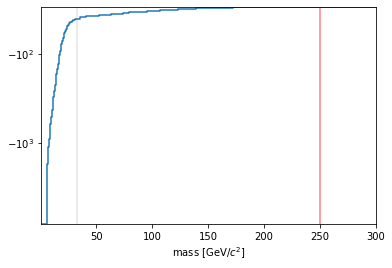

Xe


100%|██████████| 30/30 [00:31<00:00,  1.06s/it]


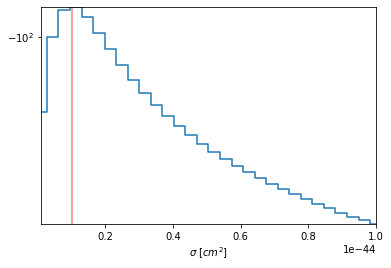

100%|██████████| 100/100 [01:13<00:00,  1.35it/s]


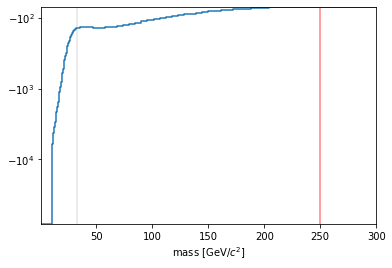

Ge


100%|██████████| 30/30 [00:32<00:00,  1.07s/it]


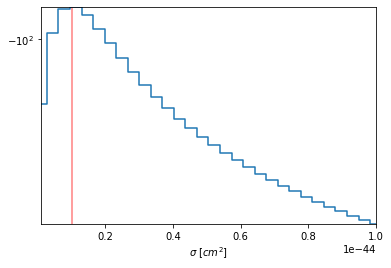

100%|██████████| 100/100 [01:26<00:00,  1.16it/s]


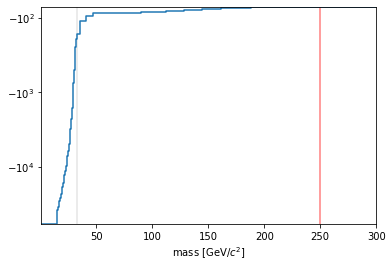

In [24]:
for m in [25, 50, 250]:
    print(f"----{m}----")
    for det in ['Ar', 'Xe', 'Ge']:
#     for det in ['Ar']:

        print(det)
        dddm.plt_ll_sigma_det(det, m=m, bins = 100)
        plt.yscale('symlog')
        plt.show()
        dddm.plt_ll_mass_det(det,  m=m, bins = 100)
    #     plt.xlim(49,55)
        plt.yscale('symlog')
        plt.show()

In [25]:
import numpy as np
from scipy.special import loggamma

def log_likelihood(lamb, S):
    return np.log(lamb) * S - loggamma(S + 1) - lamb

In [26]:
%%time
log_likelihood(1e-30,1e-20)

CPU times: user 48 µs, sys: 0 ns, total: 48 µs
Wall time: 52.9 µs


-6.907755278992137e-19

In [27]:
1e-300

1e-300

In [29]:
for i in range(20):
    dddm.log_likelihood_function(10**-i,0)

  0%|          | 0/30 [00:00<?, ?it/s]

----25----
Ar


100%|██████████| 30/30 [00:02<00:00, 11.21it/s]


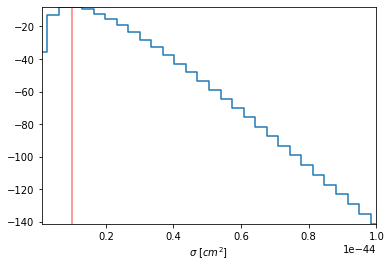

100%|██████████| 100/100 [00:08<00:00, 11.14it/s]


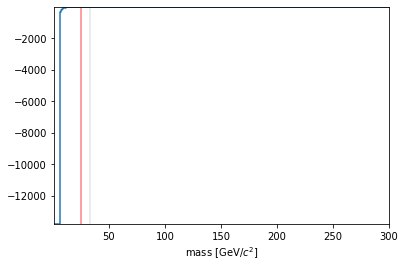

  7%|▋         | 2/30 [00:00<00:01, 18.20it/s]

Xe


100%|██████████| 30/30 [00:01<00:00, 18.25it/s]


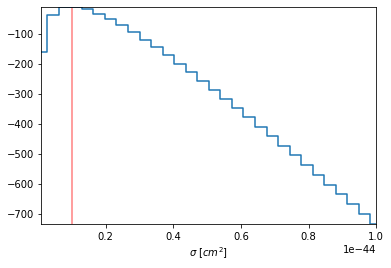

100%|██████████| 100/100 [00:07<00:00, 12.98it/s]


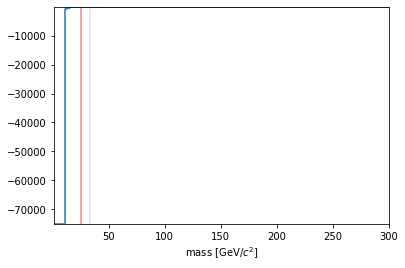

  0%|          | 0/30 [00:00<?, ?it/s]

Ge


100%|██████████| 30/30 [00:02<00:00, 13.41it/s]


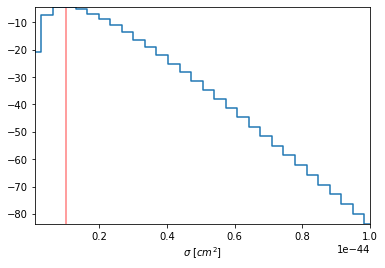

100%|██████████| 100/100 [00:08<00:00, 11.87it/s]


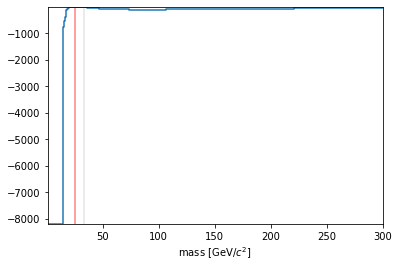

  0%|          | 0/30 [00:00<?, ?it/s]

----50----
Ar


100%|██████████| 30/30 [00:03<00:00,  9.11it/s]


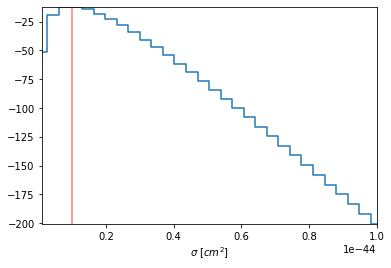

100%|██████████| 100/100 [00:08<00:00, 11.21it/s]


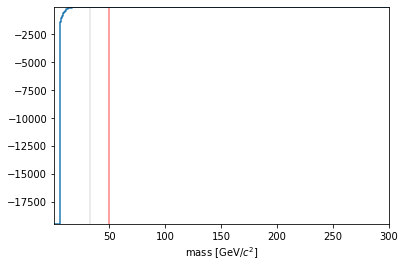

  0%|          | 0/30 [00:00<?, ?it/s]

Xe


100%|██████████| 30/30 [00:03<00:00,  9.08it/s]


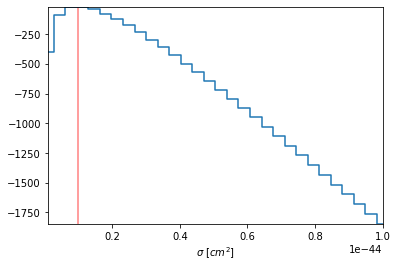

100%|██████████| 100/100 [00:07<00:00, 13.00it/s]


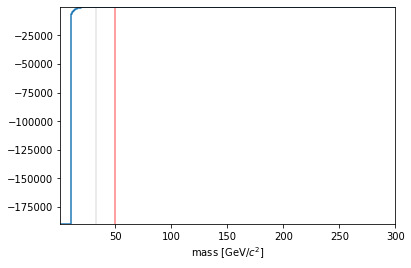

  3%|▎         | 1/30 [00:00<00:03,  9.21it/s]

Ge


100%|██████████| 30/30 [00:03<00:00,  9.06it/s]


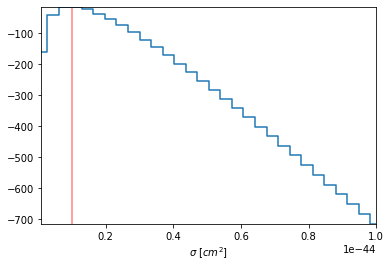

100%|██████████| 100/100 [00:08<00:00, 11.90it/s]


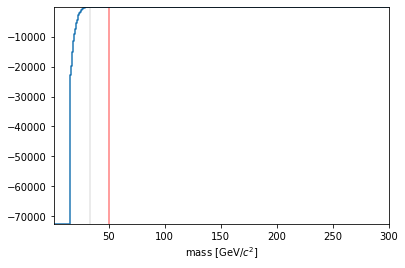

  0%|          | 0/30 [00:00<?, ?it/s]

----250----
Ar


100%|██████████| 30/30 [00:03<00:00,  9.13it/s]


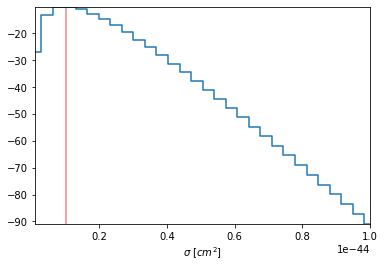

100%|██████████| 100/100 [00:08<00:00, 11.22it/s]


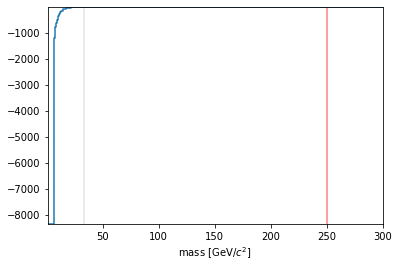

  0%|          | 0/30 [00:00<?, ?it/s]

Xe


100%|██████████| 30/30 [00:03<00:00,  9.11it/s]


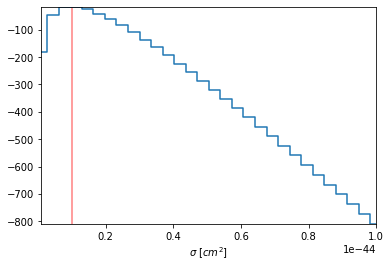

100%|██████████| 100/100 [00:07<00:00, 13.00it/s]


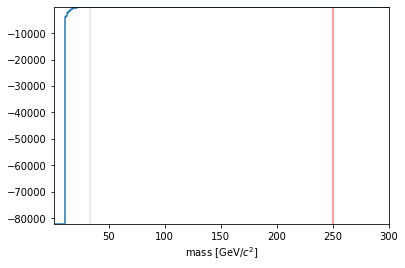

  0%|          | 0/30 [00:00<?, ?it/s]

Ge


100%|██████████| 30/30 [00:03<00:00,  9.08it/s]


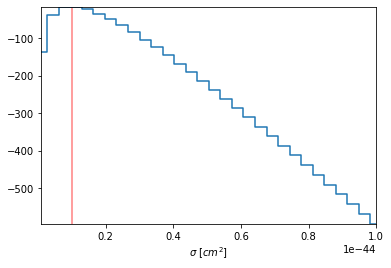

100%|██████████| 100/100 [00:08<00:00, 11.96it/s]


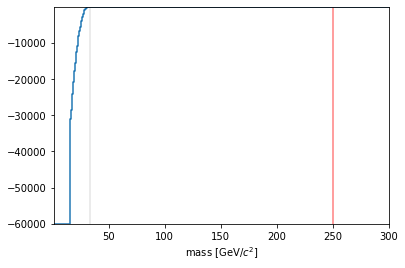

CPU times: user 1min 45s, sys: 742 ms, total: 1min 46s
Wall time: 1min 46s


In [30]:
%%time
for bins in [10]:
    for m in [25, 50, 250]:
        print(f"----{m}----")
        for det in ['Ar', 'Xe', 'Ge']:
#         for det in ['Ar']:

            print(det)
            dddm.plt_ll_sigma_det(det, m=m, bins = bins)
#             plt.yscale('symlog')
            plt.show()
            dddm.plt_ll_mass_det(det,  m=m, bins = bins)
#             plt.xlim(49,55)
#             plt.yscale('symlog')
            plt.show()
# plt.xlim(0,200)

  0%|          | 0/30 [00:00<?, ?it/s]

----25----
Ar


100%|██████████| 30/30 [00:02<00:00, 11.24it/s]


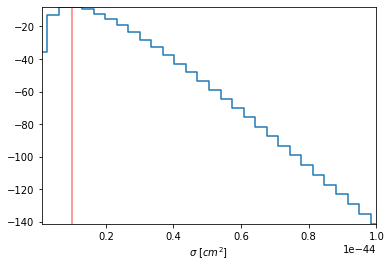

100%|██████████| 100/100 [00:08<00:00, 11.27it/s]


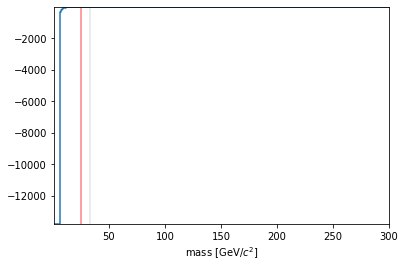

  7%|▋         | 2/30 [00:00<00:01, 18.48it/s]

Xe


100%|██████████| 30/30 [00:01<00:00, 18.38it/s]


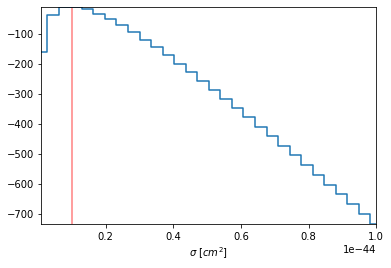

100%|██████████| 100/100 [00:07<00:00, 13.03it/s]


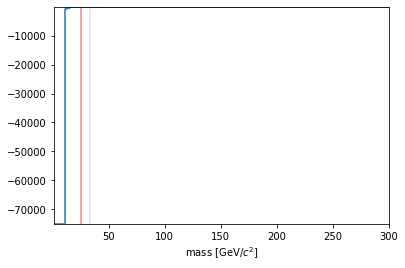

  0%|          | 0/30 [00:00<?, ?it/s]

Ge


100%|██████████| 30/30 [00:02<00:00, 13.45it/s]


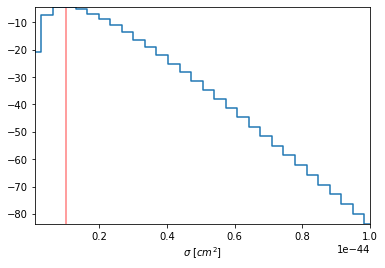

100%|██████████| 100/100 [00:08<00:00, 11.96it/s]


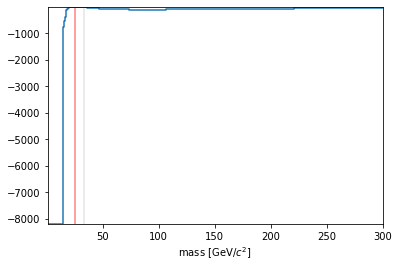

  0%|          | 0/30 [00:00<?, ?it/s]

----50----
Ar


100%|██████████| 30/30 [00:03<00:00,  9.12it/s]


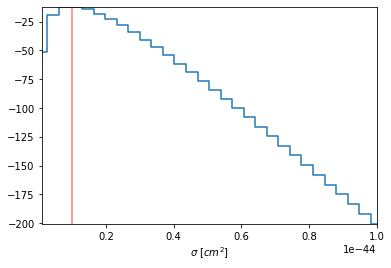

100%|██████████| 100/100 [00:08<00:00, 11.25it/s]


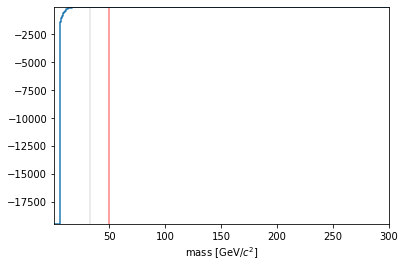

  3%|▎         | 1/30 [00:00<00:03,  9.25it/s]

Xe


100%|██████████| 30/30 [00:03<00:00,  9.13it/s]


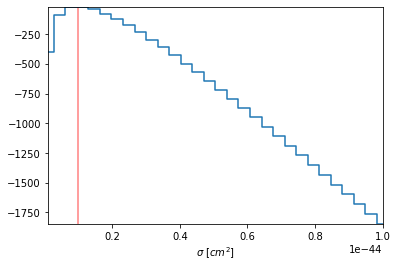

100%|██████████| 100/100 [00:07<00:00, 13.00it/s]


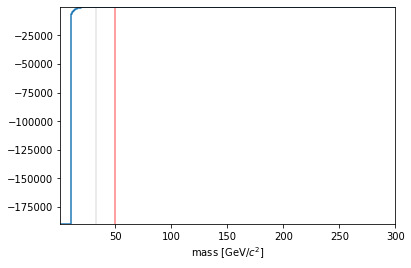

  0%|          | 0/30 [00:00<?, ?it/s]

Ge


100%|██████████| 30/30 [00:03<00:00,  9.10it/s]


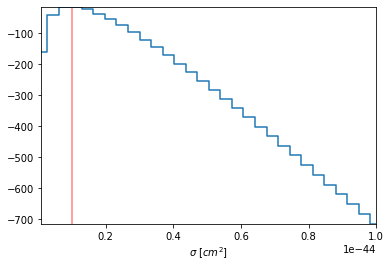

100%|██████████| 100/100 [00:08<00:00, 11.82it/s]


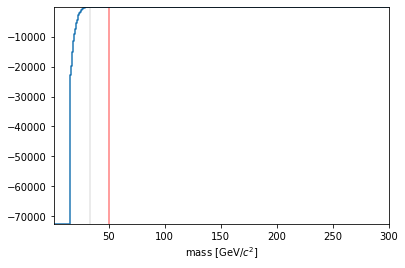

  0%|          | 0/30 [00:00<?, ?it/s]

----250----
Ar


100%|██████████| 30/30 [00:03<00:00,  9.00it/s]


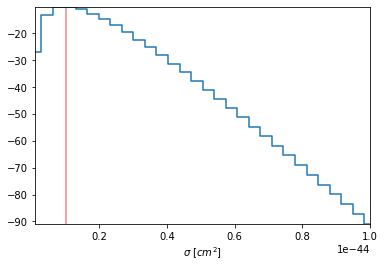

100%|██████████| 100/100 [00:08<00:00, 11.20it/s]


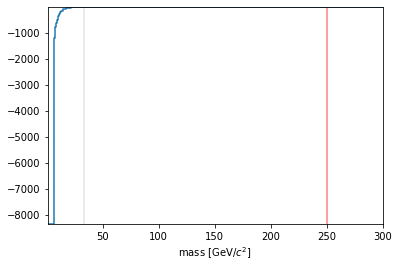

  0%|          | 0/30 [00:00<?, ?it/s]

Xe


100%|██████████| 30/30 [00:03<00:00,  9.08it/s]


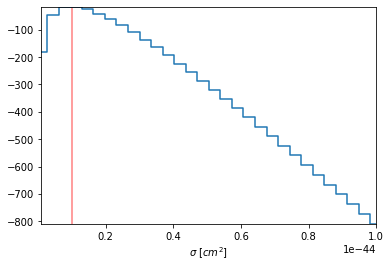

100%|██████████| 100/100 [00:07<00:00, 12.92it/s]


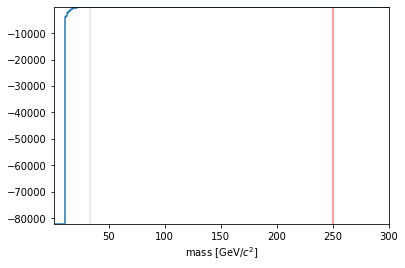

  0%|          | 0/30 [00:00<?, ?it/s]

Ge


100%|██████████| 30/30 [00:03<00:00,  9.07it/s]


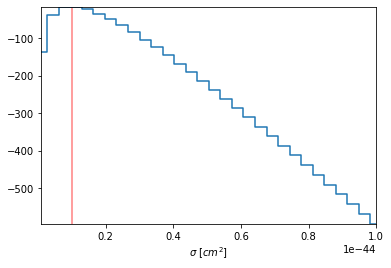

100%|██████████| 100/100 [00:08<00:00, 11.87it/s]


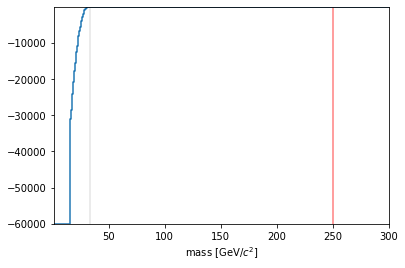

CPU times: user 1min 45s, sys: 669 ms, total: 1min 46s
Wall time: 1min 46s


In [31]:
%%time
for bins in [10]:
    for m in [25, 50, 250]:
        print(f"----{m}----")
        for det in ['Ar', 'Xe', 'Ge']:
#         for det in ['Ar']:

            print(det)
            dddm.plt_ll_sigma_det(det, m=m, bins = bins)
#             plt.yscale('symlog')
            plt.show()
            dddm.plt_ll_mass_det(det,  m=m, bins = bins)
#             plt.xlim(49,55)
#             plt.yscale('symlog')
            plt.show()
# plt.xlim(0,200)

''
 CPU times: user 3min 16s, sys: 1.7 s, total: 3min 17s
 Wall time: 3min 18s
''

CPU times: user 9.28 s, sys: 34 ms, total: 9.31 s
Wall time: 9.31 s


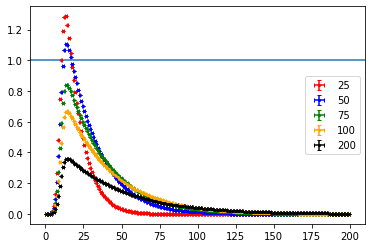

In [32]:
%%time
use_SHM = dddm.SHM()
cols = ['red', 'blue', 'green', 'orange', 'black']
for i, m in enumerate([25, 50, 75, 100, 200]):
    xe_events = dddm.DetectorSpectrum(m, 1e-45, use_SHM, dddm.detectors['Ar'])
    xe_events.n_bins = 200
    xe_events.E_max = 200
    xe_data = xe_events.get_data(poisson = False)
    dddm.plot_spectrum(xe_data, plot_error=False, label=m, color=cols[i])
plt.legend()
plt.axhline(1)
# plt.axhline(5)
# plt.yscale("log")
# xe_data

In [33]:
use_SHM = dddm.SHM()
spec50 = dddm.DetectorSpectrum(250, 1e-45, use_SHM, dddm.detectors['Ar'])
spec50.get_data(poisson = False)

,counts,bin_centers,bin_left,bin_right
0,0.320927,5.0,0.0,10.0
1,2.691208,15.0,10.0,20.0
2,2.335661,25.0,20.0,30.0
3,1.838312,35.0,30.0,40.0
4,1.439063,45.0,40.0,50.0
5,1.120874,55.0,50.0,60.0
6,0.868969,65.0,60.0,70.0
7,0.670644,75.0,70.0,80.0
8,0.507714,85.0,80.0,90.0
9,0.314864,95.0,90.0,100.0


In [34]:
use_SHM = dddm.SHM()
spec47 = dddm.DetectorSpectrum(49.2, 1e-45, use_SHM, dddm.detectors['Ar'])
spec47.get_data(poisson = False)

,counts,bin_centers,bin_left,bin_right
0,1.308769,5.0,0.0,10.0
1,10.009411,15.0,10.0,20.0
2,6.927444,25.0,20.0,30.0
3,4.216098,35.0,30.0,40.0
4,2.518604,45.0,40.0,50.0
5,1.478778,55.0,50.0,60.0
6,0.853559,65.0,60.0,70.0
7,0.483840,75.0,70.0,80.0
8,0.266701,85.0,80.0,90.0
9,0.126258,95.0,90.0,100.0


In [ ]:
use_SHM = dddm.SHM()
spec52 = dddm.DetectorSpectrum(52, 1e-45, use_SHM, dddm.detectors['Ar'])
spec52.get_data(poisson = False)

In [ ]:
def approx_log_fact(n):
    """take the approximate logarithm of factorial n for large n

    :param n: the number n
     :return:  ln(n!)"""
    assert n >= 0, f"Only take the logarithm of n>0. (n={n})"

    # if n is small, there is no need for approximation
    if n < 10:
#     try:
        # gamma equals factorial for x -> x +1 & returns results for non-int
        return np.log(np.math.gamma(n + 1))
#     except OverflowError:
    else:
#         print(n)
        # Stirling's approx. <https://nl.wikipedia.org/wiki/Formule_van_Stirling>
        return (n * np.log(n) 
                - n 
                + 0.5 * np.log(2 * np.pi *n) 
                + 1 / (12 * n) 
                - 1 / (360 * (n **3))
                + 1 / (1260 * (n**5))
                - 1/ (1680 * (n**7))
                )

In [ ]:
def real_fact(n):
    return np.log(np.math.gamma(n + 1))

In [ ]:
n = np.linspace(0.2,110,200)
y = [approx_log_fact(ni) for ni in n] 
yprime = [real_fact(ni) for ni in n] 
# plt.yscale('log')

In [ ]:
plt.plot(n,y, label = 'approx');
plt.plot(n,yprime, label = 'true');
plt.legend();

In [ ]:
# plt.plot(n,, label = 'approx');
plt.plot(n,np.array(y)/np.array(yprime));

In [ ]:
np.math.gamma(0.1)

In [ ]:
np.log(0)

In [ ]:
dddm.log_likelihood_function(0,0)

In [ ]:
assert False
dddm.show_ll_function()